In [1]:
import os
os.environ["POLARS_MAX_THREADS"] = str(os.cpu_count())  # Utilize all available cores


In [2]:
path = "G:\JaneStreetReal\jane-street-real-time-market-data-forecasting"

**ANALAZING WHOLE DATA WITH POLARS -> First appraoch**

In [14]:
import polars as pl

In [9]:
df = pl.read_parquet(f"{path}/train.parquet", memory_map=True)

In [10]:
df

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i64
0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,null,…,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504,0
0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,null,…,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639,0
0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,null,…,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828,0
0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,null,…,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,null,null,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516,0
0,0,14,0.44057,null,null,null,null,null,0.9552,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,null,0.646086,null,-1.844685,-1.58656,-0.182024,null,-0.969949,-0.673813,-1.282132,-1.399894,null,null,0.043815,-0.320225,-0.031713,null,null,…,null,null,0.476195,null,-0.771732,2.843421,null,1.379815,0.411827,-1.36224,null,null,null,null,null,-0.948601,-0.136814,-0.447704,-1.141761,0.099631,-0.661928,null,null,3.678076,2.793581,2.61825,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1698,96

In [12]:
# schema = pl.read_parquet_schema(f'{path}/train.parquet')

In [16]:
df.schema

Schema([('date_id', Int16),
        ('time_id', Int16),
        ('symbol_id', Int8),
        ('weight', Float32),
        ('feature_00', Float32),
        ('feature_01', Float32),
        ('feature_02', Float32),
        ('feature_03', Float32),
        ('feature_04', Float32),
        ('feature_05', Float32),
        ('feature_06', Float32),
        ('feature_07', Float32),
        ('feature_08', Float32),
        ('feature_09', Int8),
        ('feature_10', Int8),
        ('feature_11', Int16),
        ('feature_12', Float32),
        ('feature_13', Float32),
        ('feature_14', Float32),
        ('feature_15', Float32),
        ('feature_16', Float32),
        ('feature_17', Float32),
        ('feature_18', Float32),
        ('feature_19', Float32),
        ('feature_20', Float32),
        ('feature_21', Float32),
        ('feature_22', Float32),
        ('feature_23', Float32),
        ('feature_24', Float32),
        ('feature_25', Float32),
        ('feature_26', Float32),
   

In [17]:
df.describe()

statistic,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,…,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6827091e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.5918039e7,4.7127077e7,4.69255e7,4.7127112e7,4.7127112e7,4.7127338e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,…,4.608244e7,4.287324e7,4.7113533e7,4.608244e7,4.7127112e7,4.7127112e7,4.6648886e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6834511e7,4.6899772e7,4.6889675e7,4.6810175e7,4.6810175e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6643579e7,4.6643579e7,4.7068908e7,4.7068908e7,4.7107295e7,4.7107295e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7
"""null_count""",0.0,0.0,0.0,0.0,3.182052e6,3.182052e6,3.182052e6,3.182052e6,3.182052e6,0.0,0.0,0.0,300247.0,0.0,0.0,0.0,0.0,0.0,0.0,1.209299e6,261.0,201838.0,226.0,226.0,0.0,8.435985e6,0.0,0.0,0.0,0.0,8.435985e6,8.435985e6,0.0,0.0,0.0,8.435985e6,…,1.044898e6,4.254098e6,13805.0,1.044898e6,226.0,226.0,478452.0,0.0,0.0,0.0,292827.0,227566.0,237663.0,317163.0,317163.0,0.0,0.0,0.0,0.0,0.0,0.0,483759.0,483759.0,58430.0,58430.0,20043.0,20043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1005.479389,468.705722,18.102394,2.009445,0.573833,0.010192,0.573102,0.572745,-0.000852,-0.03838,-0.005058,-0.013839,0.082467,32.762992,4.875799,170.69312,-0.038973,-0.026642,-0.041218,-0.251219,-0.20489,-0.242808,-0.008927,-0.031894,-0.209704,0.037687,0.067906,0.072203,0.572287,0.092576,-0.049244,-0.234434,-0.155543,-0.215313,-0.2576,0.036165,…,-0.103892,0.074961,0.048527,0.086814,-0.028328,0.027874,-0.015198,-0.002545,-0.00665,0.012388,-0.179578,-0.145254,-0.166556,-0.043152,-0.050118,-0.042604,-0.023995,-0.040502,-0.032992,-0.021157,-0.036682,-0.016559,-0.023103,-0.002237,-0.008022,-0.00659,-0.012559,-0.001545,-0.000866,-0.000142,-0.01638,-0.012442,-0.016624,-0.002141,0.001476,-0.001114,5.409279
"""std""",445.181943,272.518697,11.301645,1.129388,1.327413,1.084941,1.32287,1.322849,1.037188,1.02012,1.065836,1.058633,0.973704,23.897102,3.036514,164.523054,0.93135,0.903511,0.927618,0.916496,0.891434,0.911261,1.035968,1.060218,0.905527,0.88762,0.979838,0.940164,1.449629,1.020206,1.059212,1.05812,1.038651,0.878222,0.927363,0.737381,…,1.004431,1.036738,0.914435,0.999288,0.998483,1.03619,0.951424,0.94698,0.952109,1.112283,0.79263,0.718381,0.724299,1.04563,1.065957,0.915921,0.882024,0.907692,0.942279,0.886376,0.930929,0.966191,0.958618,0.956047,0.948959,0.949269,0.943592,0.591211,0.587551,0.599179,0.819231,0.87284,0.734546,0.889852,0.916042,0.864412,2.610668
"""min""",0.0,0.0,0.0,0.149967,-5.794129,-5.741592,-5.72601,-5.60189,-5.79988,-25.350399,-58.604362,-39.085358,-15.566865,2.0,1.0,9.0,

**SECOND APPRAOCH USING DASK -> DATA IS TOO BIG FOR ANALYZING WHOLE SET**

In [10]:
import dask.dataframe as dd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data = dd.read_parquet(f'{path}\\train.parquet')
train_data.head()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.851033,...,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504,0
1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.676961,...,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639,0
2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,1.056285,...,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828,0
3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,1.139366,...,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516,0
4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,0.955200,...,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.000000,-3.572820,-1.089123,-5.000000,0


In [5]:
train_data.tail()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
272817,1698,967,34,3.242493,2.525160,-0.721981,2.544025,2.477615,0.417557,0.785812,...,0.243475,0.166927,0.384940,-0.174297,-0.066046,-0.038767,-0.132337,-0.022426,-0.252461,9
272818,1698,967,35,1.079139,1.857906,-0.790646,2.745439,2.339877,0.845065,0.651370,...,0.850152,0.909382,1.015314,0.235962,0.122539,0.099559,-0.249584,-0.123571,-0.460630,9
272819,1698,967,36,1.033172,2.515527,-0.672298,2.289250,2.521592,0.255077,0.919892,...,0.395684,-0.292574,-3.215846,-0.535129,-0.178484,-1.808150,-0.065355,-0.000367,-0.125170,9
272820,1698,967,37,1.243116,2.663298,-0.889112,2.313155,3.101428,0.324454,0.618944,...,1.925987,0.479394,3.621867,-0.107114,-0.063599,1.204755,-0.148711,-0.026583,-0.256395,9
272821,1698,967,38,3.193685,2.728506,-0.745238,2.788789,2.343393,0.454731,0.862839,...,1.228778,0.512562,-0.050865,0.160883,0.080756,-0.078237,-0.138548,-0.038771,-0.211940,9


In [24]:
print(f"Total number of rows: {len(train_data)}")

Total number of rows: 47127338


In [25]:
# Count the unique 'date_id' values
unique_dates = train_data['date_id'].nunique().compute()

print(f"Number of unique days (date_id): {unique_dates}")

Number of unique days (date_id): 1699


In [6]:
gone = train_data.isnull().sum().compute()
px.bar(gone, color=gone.values, title="Total number of missing values for each column").show()

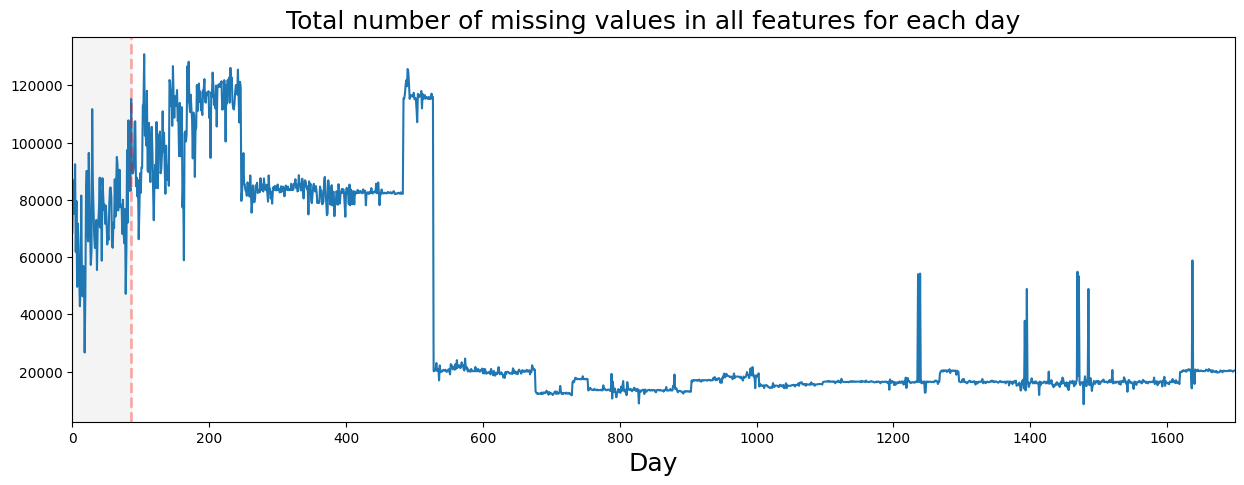

In [11]:
missing_features = train_data.iloc[:, 7:137].isnull().sum(axis=1).groupby(train_data['date_id']).sum().compute().to_frame()

# Now plot
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(missing_features)
ax.set_xlabel("Day", fontsize=18)
ax.set_title("Total number of missing values in all features for each day", fontsize=18)
ax.axvline(x=85, linestyle='--', alpha=0.3, c='red', lw=2)
ax.axvspan(0, 85, color=sns.xkcd_rgb['grey'], alpha=0.1)
ax.set_xlim(xmin=0)
ax.set_xlim(xmax=1699)
plt.show()

In [19]:
train_data_pd = train_data.compute()
train_data_pl = pl.from_pandas(train_data_pd)

MemoryError: Unable to allocate 15.1 GiB for an array with shape (86, 47127338) and data type float32

In [ ]:
count_weights = (
    train_data_pl.select(['date_id', +'weight'])
    .groupby('date_id')
    .agg(pl.count('weight').alias('weights'))
)

# Compute missing features per row
cols = train_data_pl.columns[7:137]  # Adjust column indices as needed
missing_per_row = train_data_pl.select(
    ['date_id'] + cols
).with_columns(
    pl.sum(pl.col(cols).is_null().cast(pl.Int8), axis=1).alias('missing')
).select(['date_id', 'missing'])

# Group by 'date_id' and sum 'missing'
missing_features = missing_per_row.groupby('date_id').agg(pl.sum('missing').alias('missing'))

# Merge DataFrames using Polars' join
result = count_weights.join(missing_features, on='date_id', how='inner')

# Calculate 'ratio' and 'missing_per_trade'
result = result.with_columns((pl.col('missing') / pl.col('weights')).alias('ratio'))
missing_per_trade = result['ratio'].mean()

# Now make a plot
plt.figure(figsize=(15, 5))
plt.plot(result['date_id'].to_pandas(), result['ratio'].to_pandas())
plt.axhline(missing_per_trade, linestyle='--', alpha=0.85, color='r')
plt.xlabel("Day", fontsize=18)
plt.title("Average Number of Missing Feature Values per Trade, for Each Day", fontsize=18)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'select'